In [404]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [405]:
d1 = 183.3 #joint 1 height [mm]
d2 = 737.31 #joint 2 radius [mm]
d3 = 387.8 #joint 3 radius [mm]
d4 = 95.5 #joint 4 radius [mm]
d5 = 115.5 #joint 5 radius [mm]
d6 = 76.8 #end effector offset
alpha = sp.pi/2 #standard 90 degree angle



In [406]:
#Initialize symbols
thetai = sp.Symbol('theta_i')
theta1 = sp.Symbol('theta_1')
theta2 = sp.Symbol('theta_2')
theta3 = sp.Symbol('theta_3')
theta4 = sp.Symbol('theta_4')
theta5 = sp.Symbol('theta_5')
theta6 = sp.Symbol('theta_6')
t = sp.Symbol('t')
ai = sp.Symbol('a_i')
di = sp.Symbol('d_i')
alphai = sp.Symbol('alpha_i')
pi = sp.Symbol('pi')



In [407]:
#Create dh table based on chosen coordinate frames
dh_table = {
    "": ["to 1", "to 2", "to 3", "to 4", "to 5", "to 6"],
    thetai: [theta1, pi/2 + theta2, theta3, pi/2 + theta4, theta5, theta6],
    ai: [0, d2, d3, 0, 0, 0],
    di: [d1, 0, 0, -d4, d5, 76.8],
    alphai: [alpha, 0, 0, alpha, -alpha, 0]

}

df = pd.DataFrame(dh_table)
df

,,theta_i,a_i,d_i,alpha_i
0,to 1,theta_1,0.00,183.3,pi/2
1,to 2,pi/2 + theta_2,737.31,0.0,0
2,to 3,theta_3,387.80,0.0,0
3,to 4,pi/2 + theta_4,0.00,-95.5,pi/2
4,to 5,theta_5,0.00,115.5,-pi/2
5,to 6,theta_6,0.00,76.8,0


In [408]:
#A1 transformation matrix
A1tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d1],
    [0,0,0,1]])

A1rz = sp.Matrix([
    [sp.cos(theta1),-sp.sin(theta1),0,0],
    [sp.sin(theta1),sp.cos(theta1),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A1rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(alpha),-sp.sin(alpha),0],
    [0,sp.sin(alpha),sp.cos(alpha),0],
    [0,0,0,1]])
    
A1 = A1tz*A1rz*A1rx


In [409]:
#A2 transformation matrix
A2ty = sp.Matrix([
    [1,0,0,0],
    [0,1,0,d2],
    [0,0,1,0],
    [0,0,0,1]])

A2rz = sp.Matrix([
    [sp.cos((sp.pi/2)+theta2),-sp.sin((sp.pi/2)+theta2),0,0],
    [sp.sin((sp.pi/2)+theta2),sp.cos((sp.pi/2)+theta2),0,0],
    [0,0,1,0],
    [0,0,0,1]])
    
A2 = A2ty*A2rz

In [410]:
#A3 transformation matrix
A3tx = sp.Matrix([
    [1,0,0,-d3],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]])

A3rz = sp.Matrix([
    [sp.cos(theta3),-sp.sin(theta3),0,0],
    [sp.sin(theta3),sp.cos(theta3),0,0],
    [0,0,1,0],
    [0,0,0,1]])
    
A3 = A3tx*A3rz

In [411]:
#A4 transformation matrix
A4tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d4],
    [0,0,0,1]])

A4rz = sp.Matrix([
    [sp.cos((sp.pi/2)+theta4),-sp.sin((sp.pi/2)+theta4),0,0],
    [sp.sin((sp.pi/2)+theta4),sp.cos((sp.pi/2)+theta4),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A4rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(alpha),-sp.sin(alpha),0],
    [0,sp.sin(alpha),sp.cos(alpha),0],
    [0,0,0,1]])

A4 = A4tz*A4rz*A4rx

In [412]:
#A5 transformation matrix
A5tz = sp.Matrix([
    [1,0,0,0],[0,1,0,0],
    [0,0,1,d5],
    [0,0,0,1]])

A5rz = sp.Matrix([
    [sp.cos(theta5),-sp.sin(theta5),0,0],
    [sp.sin(theta5),sp.cos(theta5),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A5rx = sp.Matrix([
    [1,0,0,0],
    [0,sp.cos(-alpha),-sp.sin(-alpha),0],
    [0,sp.sin(-alpha),sp.cos(-alpha),0],
    [0,0,0,1]])
    
A5 = A5tz*A5rz*A5rx

In [413]:
#A6 transformation matrix
A6tz = sp.Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,d6],
    [0,0,0,1]])

A6rz = sp.Matrix([
    [sp.cos(theta6),-sp.sin(theta6),0,0],
    [sp.sin(theta5),sp.cos(theta6),0,0],
    [0,0,1,0],
    [0,0,0,1]])

A6 = A6tz*A6rz

In [414]:
A = A1*A2*A3*A4*A5*A6 #Final transformation matrix with respect to base frame

In [415]:
#Create O matrix
O = sp.zeros(3,7)
a_array = [1,A1,A2,A3,A4,A5,A6]
product = sp.eye(4)
for i in range(1,7):
    product = product*a_array[i]
    O[:,i] = sp.Matrix([
        [(product)[0,3]],
        [(product)[1,3]],
        [(product)[2,3]]])

#Create Z matrix
z = sp.zeros(3,7)
z[:,0] = sp.Matrix([[0],[0],[1]])
for i in range(1,7):
    z[:,i] = sp.Matrix([
        [(a_array[i])[0,2]],
        [(a_array[i])[1,2]],
        [(a_array[i])[2,2]]])


In [416]:
#Calculate jacobian (method 1)
j = sp.zeros(6,6)
for i in range(0,6):
    j[:,i] = sp.Matrix([
        [(z.col(i)).cross((O.col(6))-(O.col(i)))],
        [z.col(i)]])


In [417]:
#initialize inputs
increment = 0.1 #time increment [s]
duration = 20 #total time [s]
arraysize = int(duration/increment) 
time = np.arange(0, duration, increment) #time array

#initial end effector posiitons with respect to base frame [mm]
ee_x_initial = 0 
ee_y_initial = -172.3-45
ee_z_initial = d1+d2+d3+d5

#Separate end effector path into 6 paths
path1_x_final = -50 #start position x of drawn shape
path1_y_final = ee_y_initial - 10 #start position y of drawn shape
path1_z_final = 1350 #start position z of drawn shape

#calculate distances traveled during paths
path1_distance = sp.sqrt(((ee_x_initial-path1_x_final)**2)+((ee_y_initial-path1_y_final)**2)+(ee_z_initial-path1_z_final)**2)
path2_distance = 50*sp.pi
path3_distance = 50
path4_distance = 100
path5_distance = 50
path6_distance = path1_distance
total_distance = path1_distance+path2_distance+path3_distance+path4_distance+path5_distance+path6_distance

#calculate time taken for each path
path1_time = (path1_distance/total_distance)*duration
path2_time = (path2_distance/total_distance)*duration
path3_time = (path3_distance/total_distance)*duration
path4_time = (path4_distance/total_distance)*duration
path5_time = (path5_distance/total_distance)*duration
path6_time = (path6_distance/total_distance)*duration

#calculate start time of each path
path1_start = 0
path2_start = path1_time.round(1)
path3_start = (path2_start+path2_time).round(1)
path4_start = (path3_start+path3_time).round(1)
path5_start = (path4_start+path4_time).round(1)
path6_start = (path5_start+path5_time).round(1)




In [418]:

#calculate path1 velocities from path 1 time and distance
path1_xdot = (path1_x_final-ee_x_initial)/path1_time
path1_ydot = (path1_y_final-ee_y_initial)/path1_time
path1_zdot = (path1_z_final-ee_z_initial)/path1_time

#equation for path 2 position with respec to time
path2_x = path1_x_final-(50*sp.cos((sp.pi/path2_time)*t))
path2_y = path1_y_final
path2_z = path1_z_final+(50*sp.sin((sp.pi/path2_time)*t))

#equation for path 2 velocities with repect to time
path2_xdot = sp.diff(path2_x,t)
path2_ydot = sp.diff(path2_y,t)
path2_zdot = sp.diff(path2_z,t)

#calculate path 3 velocities
path3_xdot = 0
path3_ydot = 0
path3_zdot = -50/path3_time

#calculate path 4 velocities
path4_xdot = -100/path4_time
path4_ydot = 0
path4_zdot = 0

#calculate path 5 velocities
path5_xdot = 0
path5_ydot = 0
path5_zdot = 50/path5_time

#calculate path 6 velocities
path6_xdot = -path1_xdot
path6_ydot = -path1_ydot
path6_zdot = -path1_zdot

#create xdot master matrix for all paths 
XDOT = sp.Matrix([
    [path1_xdot, path2_xdot, path3_xdot, path4_xdot, path5_xdot, path6_xdot],
    [path1_ydot, path2_ydot, path3_ydot, path4_ydot, path5_ydot, path6_ydot],
    [path1_zdot, path2_zdot, path3_zdot, path4_zdot, path5_zdot, path6_zdot],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])



In [419]:

#initialize array sizes for each path (for use in for loops)
path1_arraysize = int(path1_time/increment)
path2_arraysize = int(path2_time/increment)
path3_arraysize = int(path3_time/increment)
path4_arraysize = int(path4_time/increment)
path5_arraysize = int(path5_time/increment)
path6_arraysize = int(path6_time/increment)



In [420]:
#calculate initial inverse jacobian to obtain initial thetadot values
jinv_initial = (j.subs([
    (theta1,0),
    (theta2,0),
    (theta3,0),
    (theta4,0),
    (theta5,0),
    (theta6,0)])).pinv()

thetadot_initial = jinv_initial*XDOT[:,0] #initial thetadot values














In [421]:
#PATH1
#initialize theta/thetadot arrays with zeros
THETA_path1 = sp.zeros(6,path1_arraysize)
THETADOT_path1 = sp.zeros(6,path1_arraysize)


for i in range(0,6):
    THETADOT_path1[i,0] = thetadot_initial[i] #populate thetadot with initial values

#Calculate theta/thetadot for path 1
for n in range(1,path1_arraysize):
    for i in range(0,6):
        THETA_path1[i,n] = (THETA_path1[i,n-1]+((THETADOT_path1[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path1[0,n]),
        (theta2,THETA_path1[1,n]),
        (theta3,THETA_path1[2,n]),
        (theta4,THETA_path1[3,n]),
        (theta5,THETA_path1[4,n]),
        (theta6,THETA_path1[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*XDOT[:,0]
    for i in range(0,6):
        THETADOT_path1[i,n] = thetadot[i]







In [422]:
#PATH2
THETA_path2 = sp.zeros(6,path2_arraysize)
THETADOT_path2 = sp.zeros(6,path2_arraysize)

for i in range(0,6): #populate theta/thetadot initial values with last values from previous path
    THETA_path2[i,0] = THETA_path1[i,-1]
    THETADOT_path2[i,0] = THETADOT_path1[i,-1]
    
for n in range(1,path2_arraysize):
    for i in range(0,6):
        THETA_path2[i,n] = (THETA_path2[i,n-1]+((THETADOT_path2[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path2[0,n]),
        (theta2,THETA_path2[1,n]),
        (theta3,THETA_path2[2,n]),
        (theta4,THETA_path2[3,n]),
        (theta5,THETA_path2[4,n]),
        (theta6,THETA_path2[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*((XDOT[:,1]).subs([(t,time[n])])) #substituting time values into XDOT
    for i in range(0,6):
        THETADOT_path2[i,n] = thetadot[i]



In [423]:
#PATH3
THETA_path3 = sp.zeros(6,path3_arraysize)
THETADOT_path3 = sp.zeros(6,path3_arraysize)

for i in range(0,6):
    THETA_path3[i,0] = THETA_path2[i,-1]
    THETADOT_path3[i,0] = THETADOT_path2[i,-1]

for n in range(1,path3_arraysize):
    for i in range(0,6):
        THETA_path3[i,n] = (THETA_path3[i,n-1]+((THETADOT_path3[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path3[0,n]),
        (theta2,THETA_path3[1,n]),
        (theta3,THETA_path3[2,n]),
        (theta4,THETA_path3[3,n]),
        (theta5,THETA_path3[4,n]),
        (theta6,THETA_path3[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,2])
    for i in range(0,6):
        THETADOT_path3[i,n] = thetadot[i]


In [424]:
#PATH4
THETA_path4 = sp.zeros(6,path4_arraysize)
THETADOT_path4 = sp.zeros(6,path4_arraysize)

for i in range(0,6):
    THETA_path4[i,0] = THETA_path3[i,-1]
    THETADOT_path4[i,0] = THETADOT_path3[i,-1]

for n in range(1,path4_arraysize):
    for i in range(0,6):
        THETA_path4[i,n] = (THETA_path4[i,n-1]+((THETADOT_path4[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path4[0,n]),
        (theta2,THETA_path4[1,n]),
        (theta3,THETA_path4[2,n]),
        (theta4,THETA_path4[3,n]),
        (theta5,THETA_path4[4,n]),
        (theta6,THETA_path4[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,3])
    for i in range(0,6):
        THETADOT_path4[i,n] = thetadot[i]


In [425]:
#PATH 5
THETA_path5 = sp.zeros(6,path5_arraysize)
THETADOT_path5 = sp.zeros(6,path5_arraysize)

for i in range(0,6):
    THETA_path5[i,0] = THETA_path4[i,-1]
    THETADOT_path5[i,0] = THETADOT_path4[i,-1]

for n in range(1,path5_arraysize):
    for i in range(0,6):
        THETA_path5[i,n] = (THETA_path5[i,n-1]+((THETADOT_path5[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path5[0,n]),
        (theta2,THETA_path5[1,n]),
        (theta3,THETA_path5[2,n]),
        (theta4,THETA_path5[3,n]),
        (theta5,THETA_path5[4,n]),
        (theta6,THETA_path5[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,4])
    for i in range(0,6):
        THETADOT_path5[i,n] = thetadot[i]



In [426]:
#PATH 6
THETA_path6 = sp.zeros(6,path6_arraysize)
THETADOT_path6 = sp.zeros(6,path6_arraysize)

for i in range(0,6):
    THETA_path6[i,0] = THETA_path5[i,-1]
    THETADOT_path6[i,0] = THETADOT_path5[i,-1]

for n in range(1,path6_arraysize):
    for i in range(0,6):
        THETA_path6[i,n] = (THETA_path6[i,n-1]+((THETADOT_path6[i,n-1])*increment)).round(5)
    jsubs = j.subs([
        (theta1,THETA_path6[0,n]),
        (theta2,THETA_path6[1,n]),
        (theta3,THETA_path6[2,n]),
        (theta4,THETA_path6[3,n]),
        (theta5,THETA_path6[4,n]),
        (theta6,THETA_path6[5,n])])
    jinv = jsubs.pinv()
    thetadot = jinv*(XDOT[:,5])
    for i in range(0,6):
        THETADOT_path6[i,n] = thetadot[i]




In [427]:
#PLOTTING END EFFECTOR POSIITON

#initialize end effector velocity and position with zeros
end_effector_velocity = sp.zeros(3,arraysize)
end_effector_position = sp.zeros(3,arraysize)

#populate end effector position with initial end effector values
end_effector_position[0,0] = ee_x_initial
end_effector_position[1,0] = ee_y_initial
end_effector_position[2,0] = ee_z_initial

#PATH1
for n in range(0,path1_arraysize): #populating end effector velocity values for path 1
    jsubs = (j.subs([
        (theta1,THETA_path1[0,n]),
        (theta2,THETA_path1[1,n]),
        (theta3,THETA_path1[2,n]),
        (theta4,THETA_path1[3,n]),
        (theta5,THETA_path1[4,n]),
        (theta6,THETA_path1[5,n])]))
    
    jsubsthetadot =  jsubs*THETADOT_path1[:,n] #forward kinematics calculation
    end_effector_velocity[0,n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,n] = (jsubsthetadot[2]).round(5)

for i in range(1,path1_arraysize): #populating end effector position values from velocity values
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)

#PATH2
r = path1_arraysize #variable r used for indexing
for n in range(0,path2_arraysize):
    jsubs = (j.subs([
        (theta1,THETA_path2[0,n]),
        (theta2,THETA_path2[1,n]),
        (theta3,THETA_path2[2,n]),
        (theta4,THETA_path2[3,n]),
        (theta5,THETA_path2[4,n]),
        (theta6,THETA_path2[5,n])]))
    jsubsthetadot =  jsubs*THETADOT_path2[:,n]
    end_effector_velocity[0,r+n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,r+n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,r+n] = (jsubsthetadot[2]).round(5)
for i in range(r,r+path2_arraysize):
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)

#PATH3
r = r+path2_arraysize
for n in range(0,path3_arraysize):
    jsubs = (j.subs([
        (theta1,THETA_path3[0,n]),
        (theta2,THETA_path3[1,n]),
        (theta3,THETA_path3[2,n]),
        (theta4,THETA_path3[3,n]),
        (theta5,THETA_path3[4,n]),
        (theta6,THETA_path3[5,n])]))
    jsubsthetadot =  jsubs*THETADOT_path3[:,n]
    end_effector_velocity[0,r+n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,r+n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,r+n] = (jsubsthetadot[2]).round(5)
for i in range(r,r+path3_arraysize):
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)

#PATH4
r = r+path3_arraysize
for n in range(0,path4_arraysize):
    jsubs = (j.subs([
        (theta1,THETA_path4[0,n]),
        (theta2,THETA_path4[1,n]),
        (theta3,THETA_path4[2,n]),
        (theta4,THETA_path4[3,n]),
        (theta5,THETA_path4[4,n]),
        (theta6,THETA_path4[5,n])]))
    jsubsthetadot =  jsubs*THETADOT_path4[:,n]
    end_effector_velocity[0,r+n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,r+n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,r+n] = (jsubsthetadot[2]).round(5)
for i in range(r,r+path4_arraysize):
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)

#PATH 5
r = r+path4_arraysize
for n in range(0,path5_arraysize):
    jsubs = (j.subs([
        (theta1,THETA_path5[0,n]),
        (theta2,THETA_path5[1,n]),
        (theta3,THETA_path5[2,n]),
        (theta4,THETA_path5[3,n]),
        (theta5,THETA_path5[4,n]),
        (theta6,THETA_path5[5,n])]))
    jsubsthetadot =  jsubs*THETADOT_path5[:,n]
    end_effector_velocity[0,r+n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,r+n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,r+n] = (jsubsthetadot[2]).round(5)
for i in range(r,r+path5_arraysize):
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)

#PATH 6
r = r+path5_arraysize
for n in range(0,path6_arraysize):
    jsubs = (j.subs([
        (theta1,THETA_path6[0,n]),
        (theta2,THETA_path6[1,n]),
        (theta3,THETA_path6[2,n]),
        (theta4,THETA_path6[3,n]),
        (theta5,THETA_path6[4,n]),
        (theta6,THETA_path6[5,n])]))
    jsubsthetadot =  jsubs*THETADOT_path6[:,n]
    end_effector_velocity[0,r+n] = (jsubsthetadot[0]).round(5)
    end_effector_velocity[1,r+n] = (jsubsthetadot[1]).round(5)
    end_effector_velocity[2,r+n] = (jsubsthetadot[2]).round(5)
for i in range(r,r+path6_arraysize):
    end_effector_position[0,i] = (end_effector_position[0,i-1]) + ((end_effector_velocity[0,i-1])*increment)
    end_effector_position[1,i] = (end_effector_position[1,i-1]) + ((end_effector_velocity[1,i-1])*increment)
    end_effector_position[2,i] = (end_effector_position[2,i-1]) + ((end_effector_velocity[2,i-1])*increment)



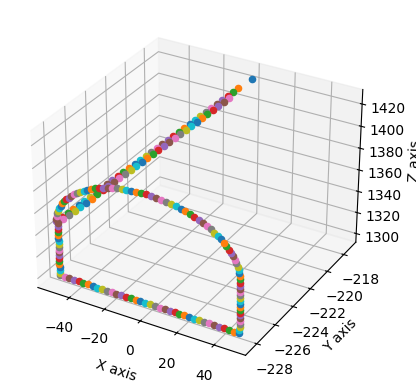

In [ ]:
#PLOT END EFFECTOR PATH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,arraysize-3): #indexing error caused last 3 position values to be 0
    
    ax.scatter([end_effector_position[0,i]], [end_effector_position[1,i]], [end_effector_position[2,i]])


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Show plot
plt.show()



In [429]:
theta1_all = [0]*arraysize

for i in range(0,path1_arraysize):
    theta1_all[i] = THETA_path1[0,i]

n = path1_arraysize
for i in range(n,n+path2_arraysize):
    theta1_all[i] = THETA_path2[0,i-n]

n = n+path2_arraysize
for i in range(n,n+path3_arraysize):
    theta1_all[i] = THETA_path3[0,i-n]

n = n+path3_arraysize
for i in range(n,n+path4_arraysize):
    theta1_all[i] = THETA_path4[0,i-n]

n=n+path4_arraysize
for i in range(n,n+path5_arraysize):
    theta1_all[i] = THETA_path5[0,i-n]

n = n+path5_arraysize
for i in range(n,n+path6_arraysize):
    theta1_all[i] = THETA_path6[0,i-n]



link1x = [0]*arraysize
link1y = [0]*arraysize
link1z = [0]*arraysize

for i in range(0,arraysize):
    link1x[i] = 172.3*sp.sin(theta1_all[i])
    link1y[i] = -172.3 + (172.3*sp.cos(theta1_all[i]))
    link1z[i] = 183.3



/tmp/ipykernel_4426/3175544301.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter([link1x], [link1y], [link1z], cmap='viridis')


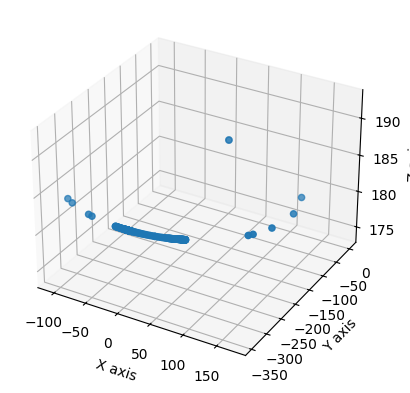

In [430]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Plot 
# for i in range(0,path2_arraysize):
    
#     ax.scatter([end_effector_position[0,i]], [end_effector_position[1,i]], [end_effector_position[2,i]], cmap='viridis')
#     # ax.set_xlim3d(-55,55)
#     # ax.set_ylim3d(-15,15)
#     # ax.set_zlim3d(1300,1500)

ax.scatter([link1x], [link1y], [link1z], cmap='viridis')
    
   


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Show plot
plt.show()

In [431]:
# i = 0
# while i < path1_arraysize:
#     plt.clf()
#     plt.plot([0, link1x[i]],[0, link2z2array[i]])
#     plt.axis('square')
#     plt.grid(True)
#     plt.xlim([-500,500])
#     plt.ylim([-500,500])
#     plt.gca().set_aspect('equal', adjustable='box')
#     i = i+1
#     plt.pause(0.05)   
